## **Preprocessing Data**

In [ ]:
#https://drive.google.com/file/d/1CI0ucQZsnIjUBP06HpAxF_97y9OydlGO/view?usp=sharing

In [1]:
!pip install --upgrade --no-cache-dir gdown      # Downloading the dataset file from google colab
!gdown 1CI0ucQZsnIjUBP06HpAxF_97y9OydlGO

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1CI0ucQZsnIjUBP06HpAxF_97y9OydlGO
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 14.9MB/s]


In [217]:
import pandas as pd

data = pd.read_csv('/content/drug200.csv')

data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [218]:
data.shape

(200, 6)

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [220]:
data.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [221]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## **Plotting**

### **Count Plot**

<Axes: xlabel='Drug', ylabel='count'>

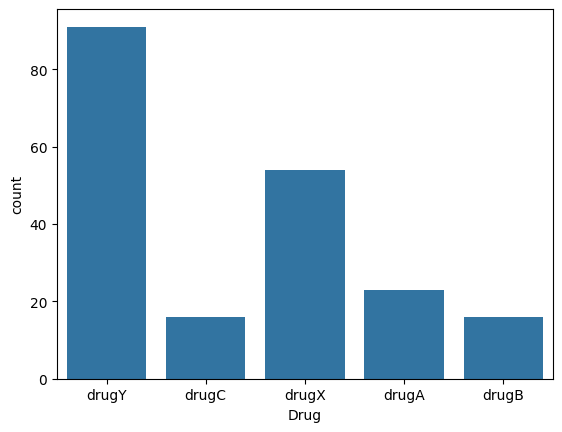

In [35]:
import seaborn as sns

sns.countplot(data=data, x = "Drug")

<Axes: xlabel='Sex', ylabel='count'>

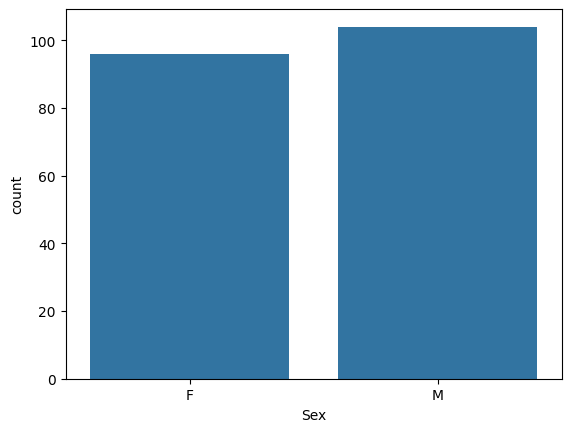

In [36]:
sns.countplot(data=data, x = "Sex")

<Axes: xlabel='BP', ylabel='count'>

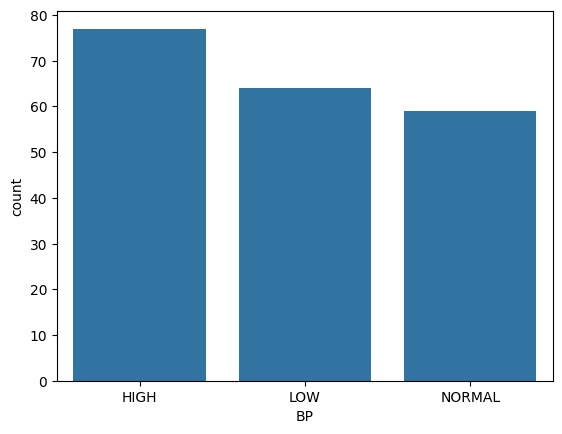

In [30]:
sns.countplot(data=data, x = "BP")

<Axes: xlabel='Cholesterol', ylabel='count'>

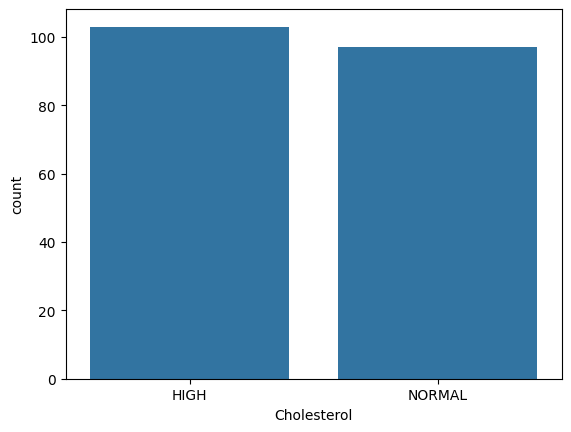

In [31]:
sns.countplot(data=data, x = "Cholesterol")

<Axes: xlabel='Drug', ylabel='count'>

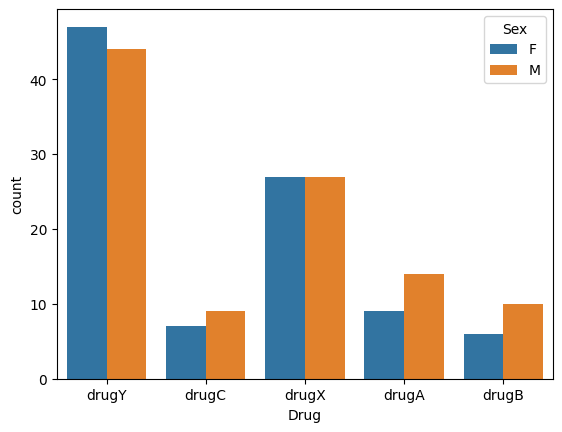

In [32]:
sns.countplot(data=data, x = "Drug", hue="Sex")

<Axes: xlabel='Drug', ylabel='count'>

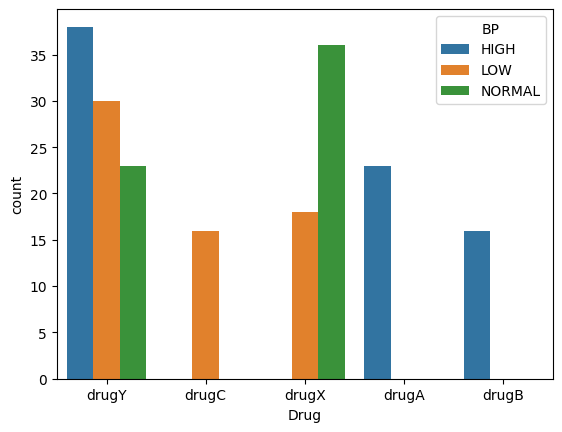

In [33]:
sns.countplot(data=data, x = "Drug", hue="BP")

<Axes: xlabel='Drug', ylabel='count'>

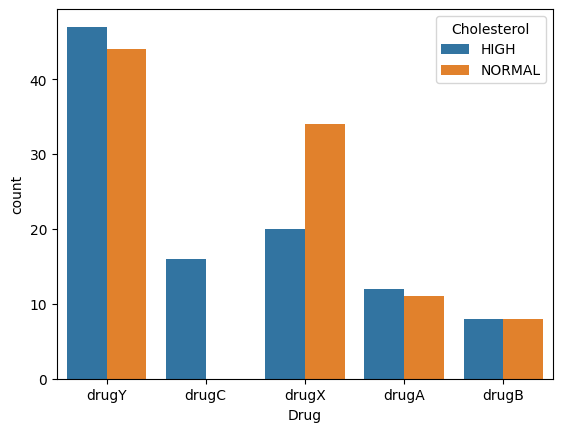

In [34]:
sns.countplot(data=data, x = "Drug", hue="Cholesterol")

### **Histogram Plot**

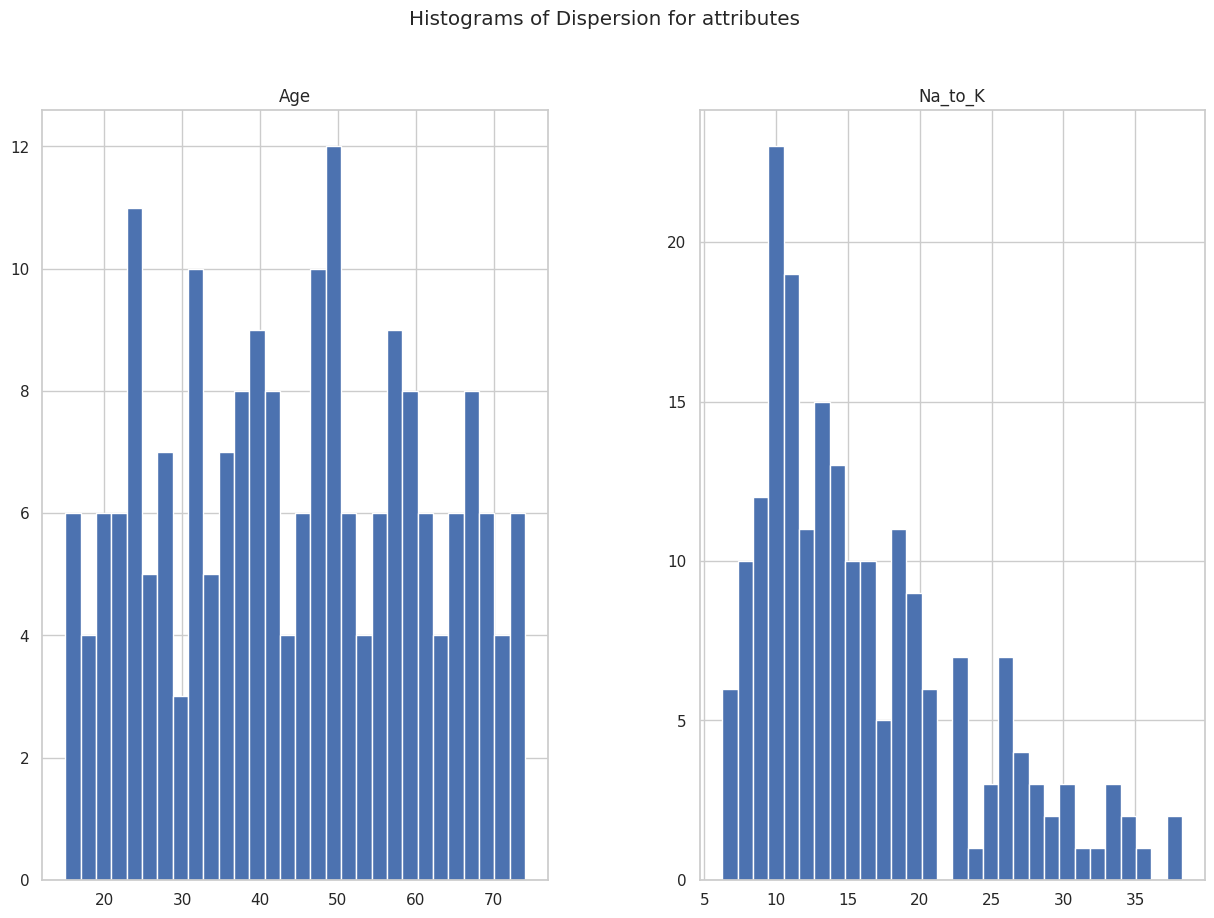

In [210]:
from matplotlib import pyplot as plt

data.hist(bins=30, figsize=(15,10))
plt.suptitle('Histograms of Dispersion for attributes')
plt.show()
#df.hist(bins=20,figsize=(10,10))

## **Feature Encoding**

### **Label Encoding for Age , Na_to_K**

In [222]:
age = data['Age']
# age

#replacing labels
for i in range(200):
  if age[i] <= 40:
     age[i]= 'young'
  elif  40 < age[i] < 60:
    age[i] = 'adult'
  elif age[i] >= 60:
    age[i] = 'old'
#replacing in data
data['Age'] = age
# data

<ipython-input-222-decceabaf282>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i]= 'young'


In [223]:
# data = pd.read_csv('drug200.csv')
na = data['Na_to_K']
# between 6.27 & 38.2

#replacing labels
for i in range(200):
  if na[i] <=15:
     na[i]= 'Normal'
  elif na[i] > 15:
     na[i] = 'High'
#replacing in data
data['Na_to_K'] = na

<ipython-input-223-9ae4000c80a6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na[i] = 'High'


In [213]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,young,F,HIGH,HIGH,High,drugY
1,adult,M,LOW,HIGH,Normal,drugC
2,adult,M,LOW,HIGH,Normal,drugC
3,young,F,NORMAL,HIGH,Normal,drugX
4,old,F,LOW,HIGH,High,drugY


### **Label Encoding for Sex , BP ,Cholesterol**

In [224]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
data["Age"] = le.fit_transform(data[["Age"]])
data["Sex"] = le.fit_transform(data[["Sex"]])
data["BP"] = le.fit_transform(data[["BP"]])
data["Cholesterol"] = le.fit_transform(data[["Cholesterol"]])
data["Na_to_K"] = le.fit_transform(data[["Na_to_K"]])

# import category encoders
#import category_encoders as ce
# encode variables with ordinal encoding
#encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])
#X_train = encoder.fit_transform(X_train)
#X_test = encoder.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [225]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,2,0,0,0,0,drugY
1,0,1,1,0,1,drugC
2,0,1,1,0,1,drugC
3,2,0,2,0,1,drugX
4,1,0,1,0,0,drugY


Age ---> (=<40) = 2 , (40<  <60) = 0 , (>=60) = 1

Sex ---> F=0 , M=1

BP ----> High=0 , Low=1 , Normal=2

Cholesterol ---> High=0 , Normal=1

Na_to_K ---> if >15 = 0 , (=<15) = 1

## **Data Splitting**

In [226]:
Data_1 = data
X = data.drop(['Drug'], axis=1)
Y = data['Drug']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)

# Dimension of Sets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (170, 5), (170,)
Test set: (30, 5), (30,)


## **Correlation Matrix**

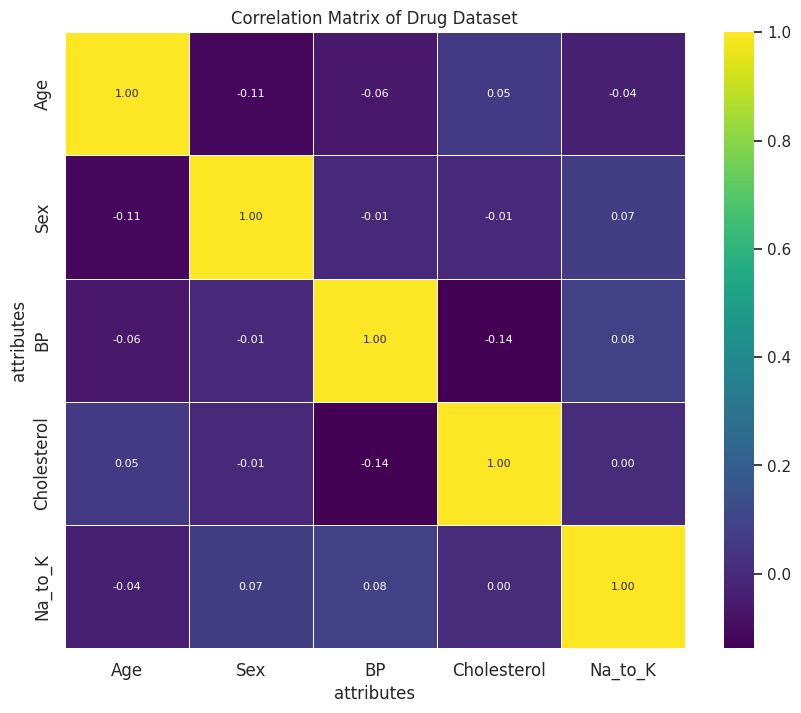

In [122]:
import pandas as pd
import seaborn as sns            #Python data visualization library based on Matplotlib (for heatmap)
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X.corr()

# Create heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, annot_kws={"size": 8}, fmt='.2f', yticklabels=corr_matrix.columns)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show Correlation matrix :
plt.title("Correlation Matrix of Drug Dataset")
plt.xlabel("attributes")
plt.ylabel("attributes")
plt.show()

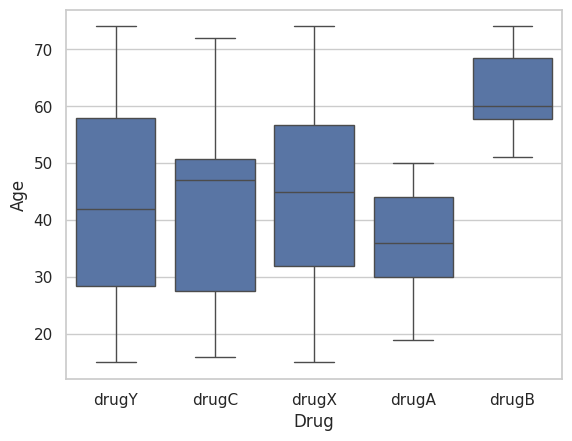

In [161]:
sns.set_theme(style="whitegrid")
sns.boxplot(x= "Drug", y="Age", data = data)
plt.show()


#seaborn Themes :
#darkgrid: شبکه تاریک (پیش‌فرض)
#whitegrid: شبکه روشن
#dark: پس‌زمینه تاریک بدون شبکه
#white: پس‌زمینه روشن بدون شبکه
#ticks: پس‌زمینه روشن با تیک‌های کوچک

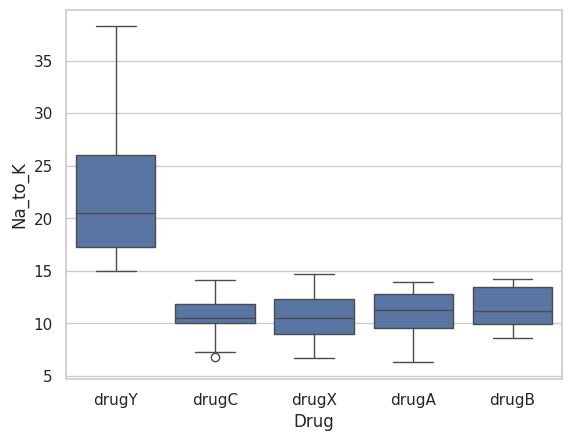

In [163]:
sns.set_theme(style="whitegrid")
sns.boxplot(x= "Drug", y="Na_to_K", data = data)
plt.show()

## **My Decision Tree**

### **Entropy**

\begin{align}
\text{Entropy}(Y) = -\sum_{i=1}^{C} p_i \log_2(p_i)
\end{align}

In [167]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))

In [227]:
entropy(Data_1['Drug']),entropy(Data_1['Sex']),entropy(Data_1['BP']),entropy(Data_1['Cholesterol']) ,entropy(Data_1['Age']) ,entropy(Data_1['Na_to_K'])

(1.968780377953625,
 0.9988455359952018,
 1.5757636720454444,
 0.9993506898146103,
 1.535771456381236,
 0.9941491714808931)

### **Information Gain**

\begin{align}
\text{Information Gain}(\text{Feature}) = \text{Entropy}(\text{Parent}) - \sum_{\text{value} \in \text{Feature}} \frac{|\text{Subset with value}|}{|\text{Parent}|} \times \text{Entropy}(\text{Subset with value})
\end{align}

In [228]:
for value in data['BP'].unique():
 print(value)

0
1
2


In [229]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

In [230]:
Data_1.iloc[:, :-1].columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [231]:
[information_gain(Data_1, feature, 'Drug') for feature in Data_1.iloc[:, :-1].columns]

[0.13181944392177591,
 0.007703482714548349,
 0.6201266774024412,
 0.0931061958075754,
 0.994149171480893]

### **Decision Tree**

In [232]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'


In [233]:
def make_tree(data, target):
    # leaf node?
    if len(data[target].unique()) == 1:
        return Node(label=data[target].iloc[0])

    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]

    # make a node
    node = Node(feature=best_feature)

    # loop over the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)
        # display(subset)

        node.children[value] = make_tree(subset, target)

    return node

tree = make_tree(Data_1, 'Drug')

In [234]:
tree = make_tree(Data_1, 'Drug')
tree

DecisionNode(feature="Na_to_K", children={0: LeafNode(label="drugY"), 1: DecisionNode(feature="BP", children={1: DecisionNode(feature="Cholesterol", children={0: LeafNode(label="drugC"), 1: LeafNode(label="drugX")}), 2: LeafNode(label="drugX"), 0: DecisionNode(feature="Age", children={0: DecisionNode(feature="Sex", children={1: DecisionNode(feature="Cholesterol", children={0: LeafNode(label="drugA"), 1: LeafNode(label="drugA")}), 0: DecisionNode(feature="Cholesterol", children={1: LeafNode(label="drugB"), 0: LeafNode(label="drugA")})}), 1: LeafNode(label="drugB"), 2: LeafNode(label="drugA")})})})

In [235]:
tree.feature

'Na_to_K'

In [236]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()

    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U5')) -> None

In [237]:
def predict(node, sample):
    if node.feature is None:
        return node.label

    feature_value = sample[node.feature]

    if feature_value in node.children:
        return predict(node.children[feature_value], sample)
    else:
        return node.label

[predict(tree, sample) for _, sample in X_test.iterrows()]

['drugX',
 'drugY',
 'drugX',
 'drugC',
 'drugY',
 'drugY',
 'drugY',
 'drugX',
 'drugA',
 'drugX',
 'drugA',
 'drugX',
 'drugY',
 'drugA',
 'drugB',
 'drugY',
 'drugB',
 'drugX',
 'drugC',
 'drugY',
 'drugB',
 'drugX',
 'drugX',
 'drugY',
 'drugY',
 'drugY',
 'drugC',
 'drugX',
 'drugY',
 'drugX']

In [238]:
predicted = [predict(tree, sample) for _, sample in X_test.iterrows()]
T= y_test
actual = T.reset_index(drop=True)

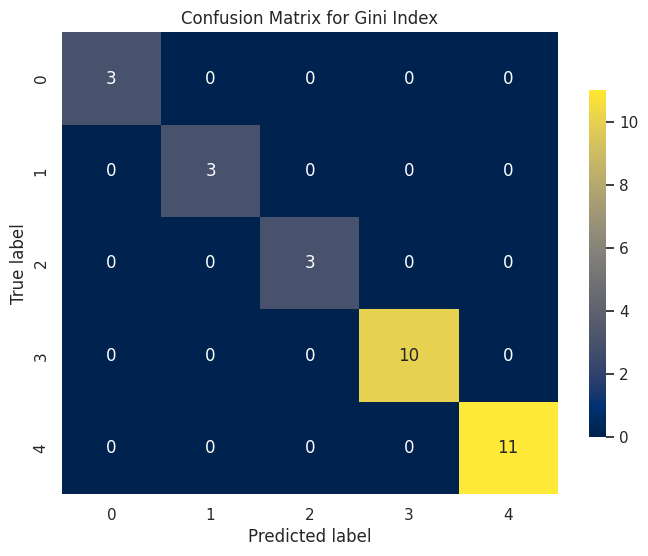

In [239]:
# Calculate and plot the confusion matrix
from sklearn.metrics import  confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(actual, predicted)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar_kws={'shrink': .75})
plt.title('Confusion Matrix for Gini Index')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [240]:
s= 0
for i in range(30):
  if actual[i] == predicted[i]:
    s = s + 1
  else:
    s = s + 0

print(s)

30


# **Part 2: Decision Tree**

## **Gini Index**

In [241]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# Calculate and plot the average precision, recall, and F1 score
precision = precision_score(y_test, y_pred_gini, average='weighted')
recall = recall_score(y_test, y_pred_gini, average='weighted')
f1 = f1_score(y_test, y_pred_gini, average='weighted')

print('\nPrecision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Model accuracy score with criterion gini index: 0.8000
Training-set accuracy score: 0.8824

Precision: 0.9125
Recall: 0.8
F1 score: 0.8091486291486291


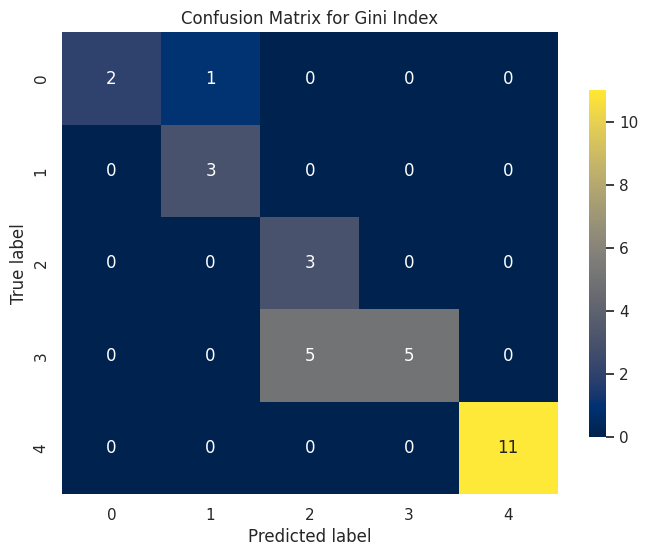

In [242]:
# Calculate and plot the confusion matrix
from sklearn.metrics import  confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_gini)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar_kws={'shrink': .75})
plt.title('Confusion Matrix for Gini Index')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

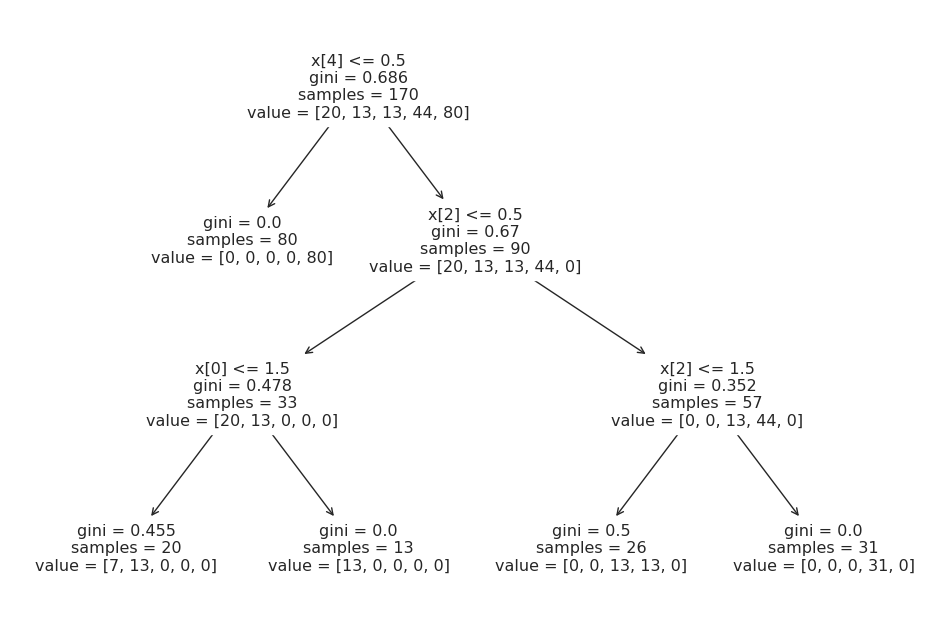

In [243]:
from sklearn import tree
#from sklearn.tree import  plot_tree

plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))

plt.show()

## **Entropy Index**

In [244]:
#instantiate the DecisionTreeClassifier model with criterion entropy
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

# Calculate and plot the average precision, recall, and F1 score
precision = precision_score(y_test, y_pred_en, average='weighted')
recall = recall_score(y_test, y_pred_en, average='weighted')
f1 = f1_score(y_test, y_pred_en, average='weighted')

print('\nPrecision:', precision)
print('Recall:', recall)
print('F1 score:', f1)



Model accuracy score with criterion entropy: 0.8000
Training-set accuracy score: 0.8824

Precision: 0.9125
Recall: 0.8
F1 score: 0.8091486291486291


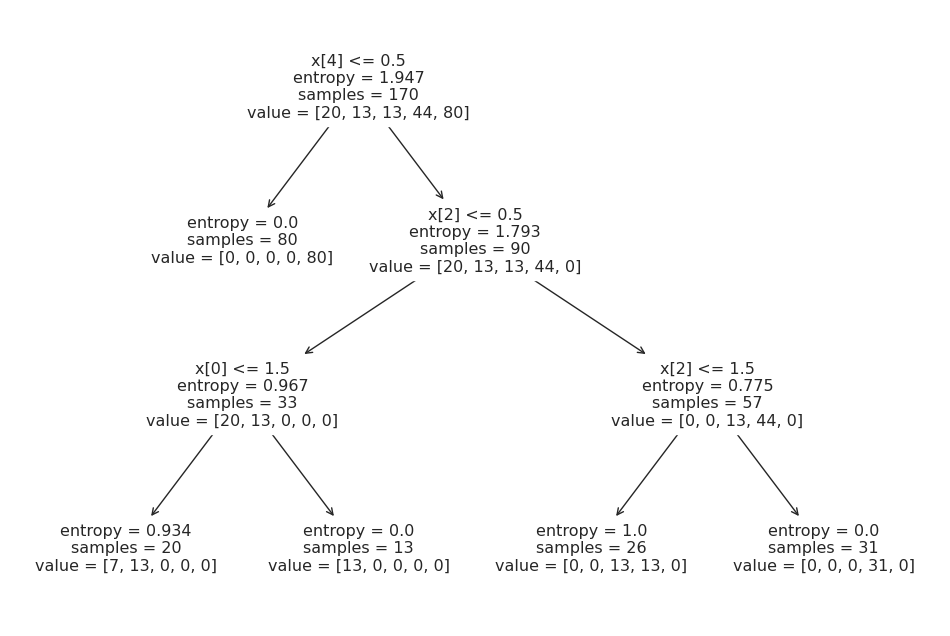

In [245]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))
plt.show()

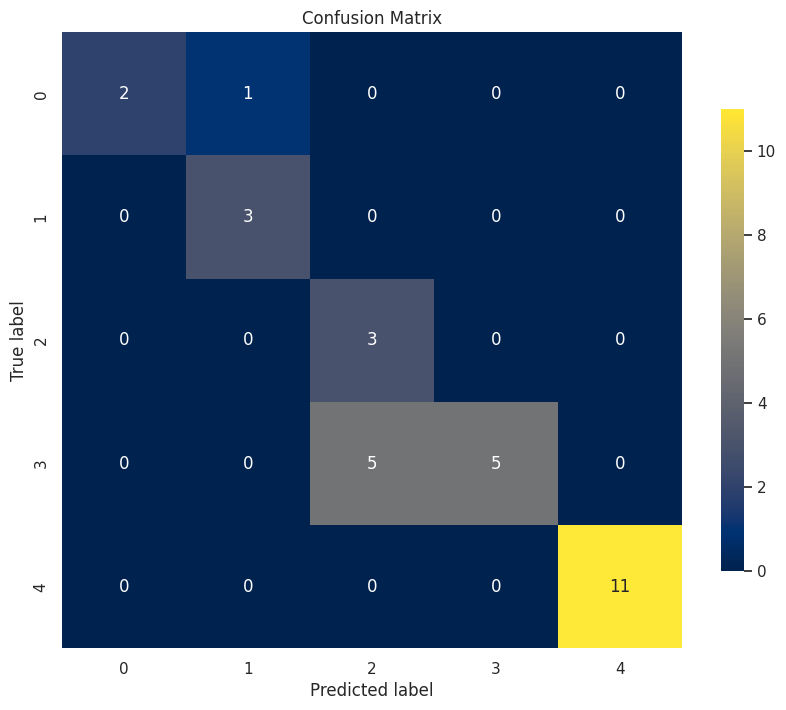

In [246]:
# Calculate and plot the confusion matrix
from sklearn.metrics import  confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_en)

# Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar_kws={'shrink': .75})
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## **Camparision**

In [132]:
if accuracy_score(y_test, y_pred_gini) > accuracy_score(y_train, y_pred_train_en):
   print("Gini Index Criterion is Better and it has accuracy equal to ", accuracy_score(y_test, y_pred_gini)*100)
elif accuracy_score(y_test, y_pred_gini) < accuracy_score(y_train, y_pred_train_en):
    print("Entropy Criterion is Better and it has accuracy equal to ", accuracy_score(y_train, y_pred_train_en)*100)
else:
   print("Entropy Criterion & Gini Index are equal and  accuracy is equal to ", accuracy_score(y_train, y_pred_train_en)*100)

Entropy Criterion is Better and it has accuracy equal to  88.23529411764706


## **Hyperparameters**

### **Max Depth**

In [101]:
# max_depth
depths = [2, 3, 4, 8]
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Max Depth: {depth}, Accuracy: {accuracy:.2f}')

Max Depth: 2, Accuracy: 0.80
Max Depth: 3, Accuracy: 0.83
Max Depth: 4, Accuracy: 1.00
Max Depth: 8, Accuracy: 1.00


### **Min Samples Split**

In [102]:
# min_samples_split
splits = [2, 10, 20, 100]
for split in splits:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Min Samples Split: {split}, Accuracy: {accuracy:.2f}')


Min Samples Split: 2, Accuracy: 1.00
Min Samples Split: 10, Accuracy: 1.00
Min Samples Split: 20, Accuracy: 1.00
Min Samples Split: 100, Accuracy: 0.70


# **Part 3 : Adaboost , RandomForest**

## **AdaBoost**

In [247]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# base with low depth
base = DecisionTreeClassifier(max_depth=None, random_state=64)

ada_clf = AdaBoostClassifier(base_estimator=base, n_estimators=50, random_state=64)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'AdaBoost - Accuracy: {accuracy:.2f}')
print(f'AdaBoost - Precision: {precision:.2f}')
print(f'AdaBoost - Recall: {recall:.2f}')


AdaBoost - Accuracy: 1.00
AdaBoost - Precision: 1.00
AdaBoost - Recall: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


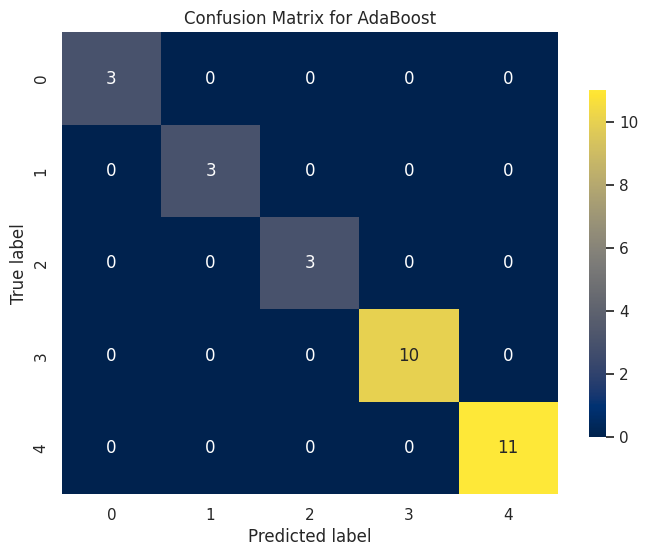

In [248]:
# Calculate and plot the confusion matrix
from sklearn.metrics import  confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar_kws={'shrink': .75})
plt.title('Confusion Matrix for AdaBoost')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## **Random Forest**

In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

rf_clf = RandomForestClassifier(max_depth=8, random_state=64)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'RandomForest - Accuracy: {accuracy:.2f}')
print(f'RandomForest - Precision: {precision:.2f}')
print(f'RandomForest - Recall: {recall:.2f}')


RandomForest - Accuracy: 1.00
RandomForest - Precision: 1.00
RandomForest - Recall: 1.00


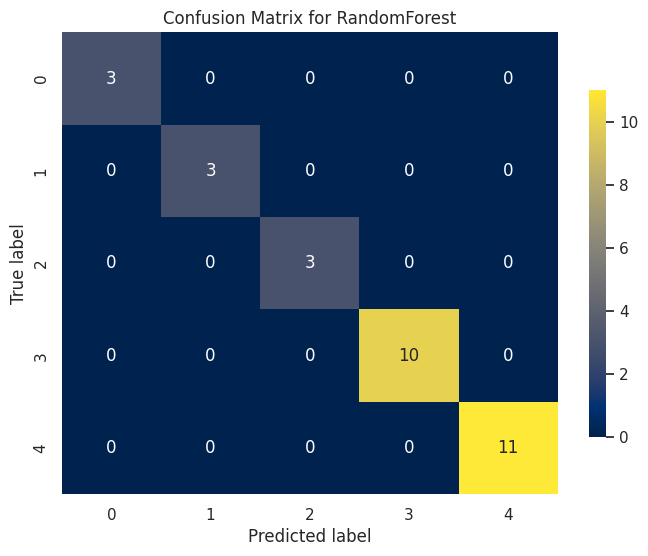

In [250]:
# Calculate and plot the confusion matrix
from sklearn.metrics import  confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar_kws={'shrink': .75})
plt.title('Confusion Matrix for RandomForest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()